## Name : Junaid Salman
## DEP Internship Task # 1

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c boston-housing

In [25]:
!unzip boston-housing.zip
!rm boston-housing.zip

Archive:  boston-housing.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [27]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

In [ ]:
train_df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [28]:
# Removing Duplicates
print(train_df.duplicated().sum())
train_df = train_df.drop_duplicates()

0


## Feature Scaling / Engineering

In [29]:
# Applying Scaling to features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop(['medv'], axis=1))
scaled_train_df = pd.DataFrame(scaled_features, columns=train_df.columns.drop('medv'))
scaled_train_df['medv'] = train_df['medv']

In [30]:
# Splitting the dataset
X = scaled_train_df.drop('medv', axis=1)
y = scaled_train_df['medv']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Training

In [31]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Validation RMSE: ", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Train R^2: ", r2_score(y_train, y_train_pred))
print("Validation R^2: ", r2_score(y_val, y_val_pred))

Train RMSE:  4.726094965608309
Validation RMSE:  4.8385640252660105
Train R^2:  0.7286502774469663
Validation R^2:  0.7398653051224348


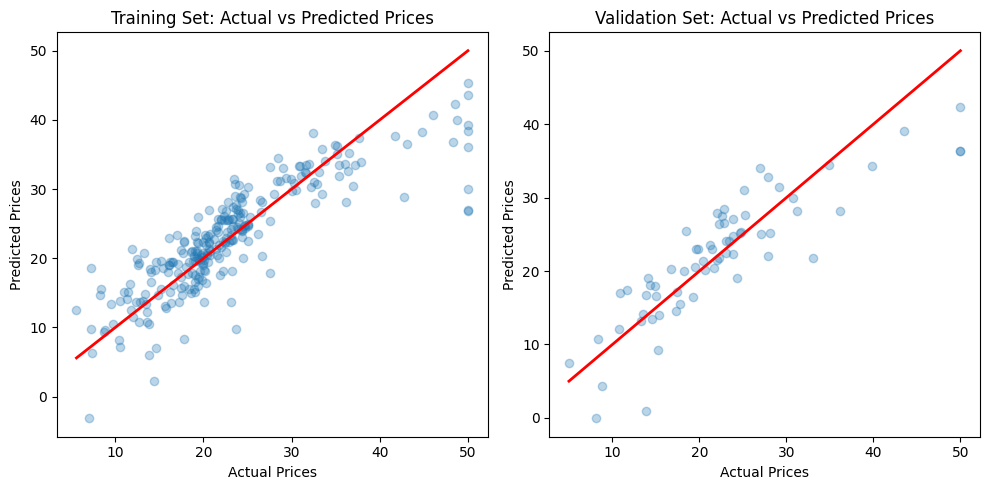

In [33]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for training set
plt.figure(figsize=(10, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training Set: Actual vs Predicted Prices')

# Validation set
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_val_pred, alpha=0.3)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Validation Set: Actual vs Predicted Prices')

plt.tight_layout()
plt.show()


## Fine Tuning

In [32]:
# Fine-Tuning the Model
# Using Grid Search for hyperparameter tuning (if needed)
from sklearn.model_selection import GridSearchCV

# Example: tuning for Ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
y_val_pred_ridge = best_ridge.predict(X_val)

print("Best Ridge Validation RMSE: ", np.sqrt(mean_squared_error(y_val, y_val_pred_ridge)))
print("Best Ridge Validation R^2: ", r2_score(y_val, y_val_pred_ridge))

Best Ridge Validation RMSE:  4.819978359493449
Best Ridge Validation R^2:  0.7418599014162939
